In [1]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns = ['CustomerID', 'Gender', 'Age', 'Annual Income','Spending Score']
df = pd.read_csv("Mall_Customers.csv")
df.columns = columns
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df["Gender"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [4]:
clustering = DBSCAN(eps=15, min_samples=4)
clustering.fit(df)
clusters = clustering.labels_
print(np.unique(clusters))

[-1  0  1  2  3  4  5]


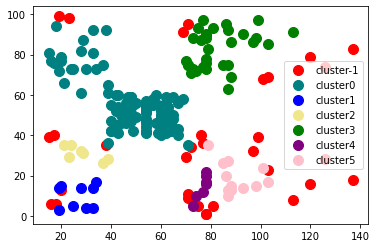

In [5]:
colors = ["red","teal","blue","khaki","green","purple","pink","lime","black","yellow","cyan","brown","orange","violet"]

for i in np.unique(clusters):
    plt.scatter(df.iloc[clusters == i, 3], df.iloc[clusters == i, 4], s = 100, c = colors[i+1], label = 'cluster{}'.format(i))
plt.legend()

In [6]:
neigh = NearestNeighbors(n_neighbors=4, radius = 4)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

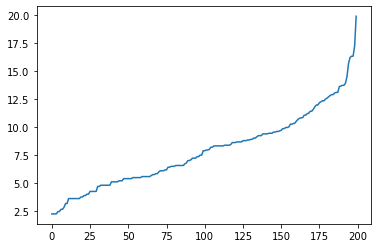

In [7]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)